# TSF Model Demo Monthly

This scripts provides a template to build a time series model using the SARIMA algorithm. It uses demo data for the sales of cars where the data observation frequency is monthly.

In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels as sm

from tsf.SARIMA_tsf import SARIMA_tsf

ModuleNotFoundError: No module named 'tsf'

## Data Prep

Note - this will be unique to each different dataset

In [2]:
# Load Data

file = "data/car_sales_by_month.csv"
df = pd.read_csv(file, sep=',', header=0)

In [3]:
df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [4]:
# Replace any NaN values with 0 and create additional features
df = df.fillna(0)
df['Day'] = '1'
df['Date'] = pd.to_datetime(df[['Year','Month', 'Day']], format = "%y-%m")
df['Quantity_Petrol'] = df['Quantity'] - df['Quantity_Diesel'] - df['Quantity_Hybrid'] - df['Quantity_Electric']                    
df['Non_Import'] = df['Quantity'] - df['Import']

In [5]:
# Convert Date to a Year_Month format and drop unnecessary features
df['Year_Month'] = df['Date'].dt.to_period('M')
df = df.drop(['Year','Month', 'Day','Diesel_Share_LY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2'], axis = 1)
df.head()

,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Quantity_Diesel,Diesel_Share,Quantity_Hybrid,Quantity_Electric,Import_Electric,Date,Quantity_Petrol,Non_Import,Year_Month
0,12685,5227,2276,257,0.0,0.0,10072,79.4,0.0,0.0,0.0,2007-01-01,2613.0,10409,2007-01
1,9793,2448,1992,-89,0.0,0.0,7222,73.7,0.0,0.0,0.0,2007-02-01,2571.0,7801,2007-02
2,11264,1445,2626,45,0.0,0.0,7965,70.7,0.0,0.0,0.0,2007-03-01,3299.0,8638,2007-03
3,8854,504,2220,-130,0.0,0.0,6116,69.1,0.0,0.0,0.0,2007-04-01,2738.0,6634,2007-04
4,12007,1592,2881,7,0.0,0.0,8519,71.0,0.0,0.0,0.0,2007-05-01,3488.0,9126,2007-05


In [6]:
# Split the data into test and train and then calculate the sum of Quantity for each Year_Month value
df_sales = df.drop(['Date'], axis=1)
df_sales = df_sales.groupby(['Year_Month'])['Quantity'].sum().to_frame()
df_sales.index = df_sales.index.to_timestamp()
print(df_sales.head())

            Quantity
Year_Month          
2007-01-01     12685
2007-02-01      9793
2007-03-01     11264
2007-04-01      8854
2007-05-01     12007


In [7]:
# Split the data into test and train and then calculate the sum of Quantity for each Year_Month value
df_days = df.drop(['Year_Month'], axis=1)
df_days = df_days.groupby(['Date'])['Quantity'].sum().to_frame()
print(df_days.head())

            Quantity
Date                
2007-01-01     12685
2007-02-01      9793
2007-03-01     11264
2007-04-01      8854
2007-05-01     12007


In [8]:

x = df_sales.reset_index()['Year_Month']
x

0     2007-01-01
1     2007-02-01
2     2007-03-01
3     2007-04-01
4     2007-05-01
         ...    
116   2016-09-01
117   2016-10-01
118   2016-11-01
119   2016-12-01
120   2017-01-01
Name: Year_Month, Length: 121, dtype: datetime64[ns]

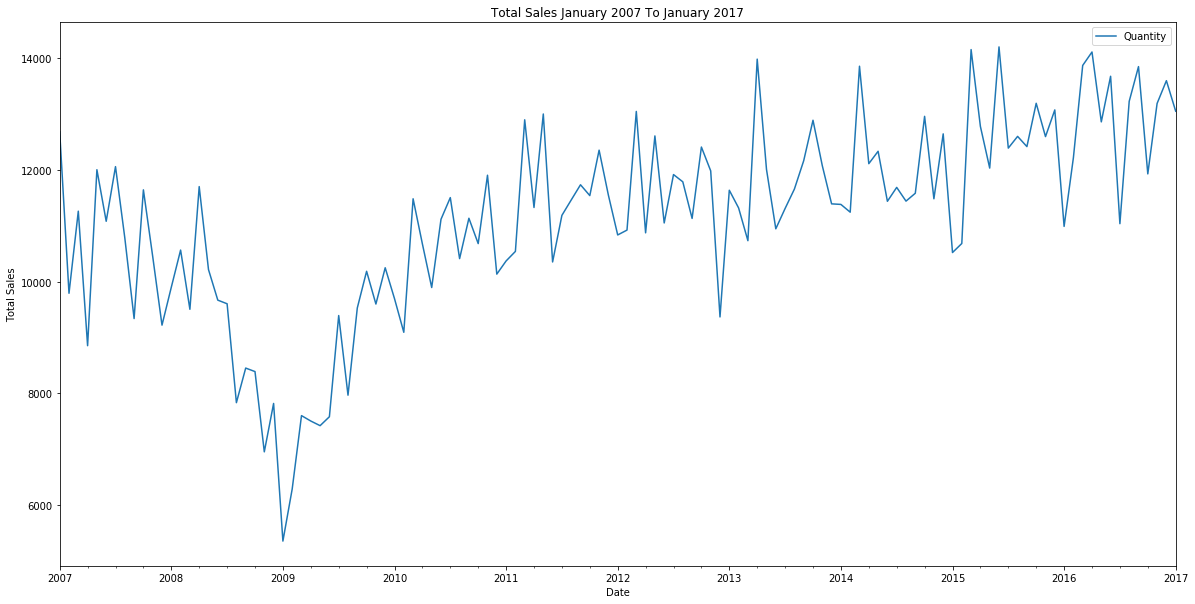

In [9]:
# Plots the training data
df_sales_fig = df_sales.plot(figsize=(20,10), title="Total Sales January 2007 To January 2017")
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

## Using TimeSeriesForecasting package

In [10]:
# Creates the SARIMA_tsf object
tsf = SARIMA_tsf()

Displaying rolling plot...


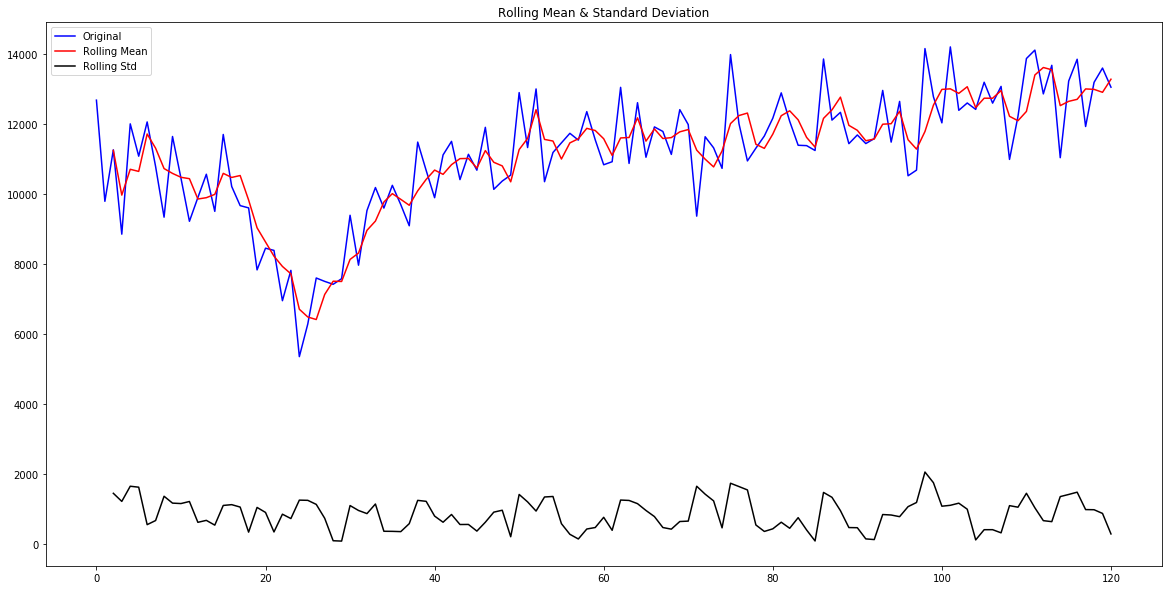

In [11]:
# Performs a 3 month rolling period on the sales data
rolling_plot = tsf.display_rolling_plot(df_sales, 3)

In [12]:
# Performs the dickey fuller test to check if the data is stationary
dickey_test = tsf.dickey_fuller_test(df_sales)
dickey_test

Test Statistic                  -0.972475
p-value                          0.763171
#Lags Used                       6.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64

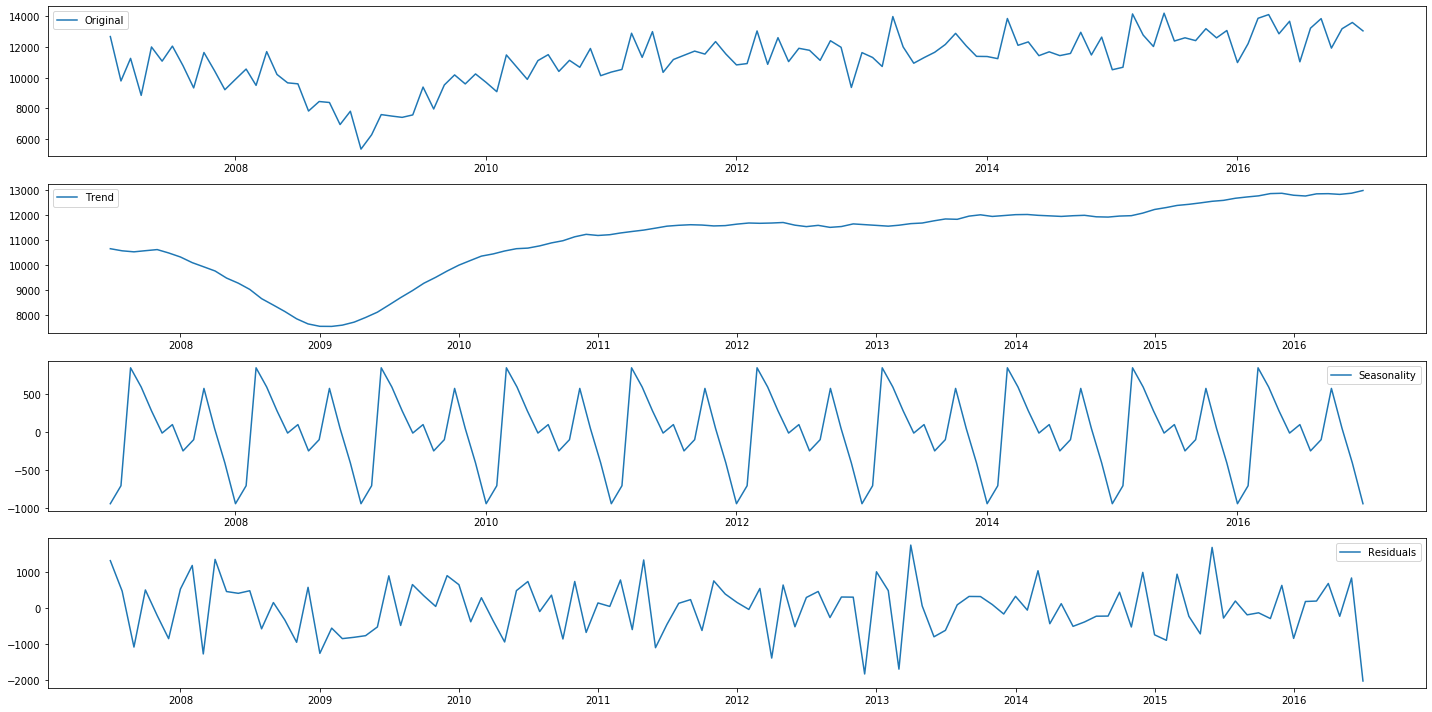

In [13]:
# Performs seasonal decomposition to separate the trend, seasonal and residual components of the time series
decompose, decom_fig = tsf.decompose(df_sales, 'additive')

## Two Methods

grid_search_CV -  if you want the models measured against MAPE (mean absolute percentage error)

grid_search_run - if you want the models measured against AIC (Akaike Information Criterion)

### Grid Search with Cross Validation



In [14]:
# Performs a GridSearch where the frequency of observations is monthly. We want to perform 12 
# validations where each forecast for 6 months
grid_cv_df = tsf.grid_search_CV(df_sales, range(0,2), [12], {'months': -12}, {'months': 6})

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
grid_cv_df

,order_param,seasonal_order_param,mape_total,mape_months
0,"(0, 0, 0)","(0, 0, 0, 12)",100.0,100.0
1,"(0, 0, 0)","(0, 0, 1, 12)",64.33,64.48
2,"(0, 0, 0)","(0, 1, 0, 12)",6.09,6.77
3,"(0, 0, 0)","(0, 1, 1, 12)",6.62,6.79
4,"(0, 0, 0)","(1, 0, 0, 12)",5.77,6.55
...,...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",3.19,5.22
60,"(1, 1, 1)","(1, 0, 0, 12)",3.7,5.75
61,"(1, 1, 1)","(1, 0, 1, 12)",3.7,5.72
62,"(1, 1, 1)","(1, 1, 0, 12)",3.87,5.81


In [16]:
# Sorts the grid_cv_df by 'mape_months' and returns the top 5 mape
grid_cv_df.sort_values('mape_months', ascending=True).head(5)

,order_param,seasonal_order_param,mape_total,mape_months
0,"(0, 0, 0)","(0, 0, 0, 12)",100.0,100.0
13,"(0, 0, 1)","(1, 0, 1, 12)",1.03,4.17
5,"(0, 0, 0)","(1, 0, 1, 12)",1.14,4.24
31,"(0, 1, 1)","(1, 1, 1, 12)",3.05,5.09
27,"(0, 1, 1)","(0, 1, 1, 12)",3.05,5.1


### Grid Search Run

In [17]:
# Performs Grid Search and returns the AIC score of each
aic_scores = tsf.grid_search_run(df_sales, range(0,2), [12])

In [18]:
# This should only be ran if grid_search_run is used
# Performs cross validation for the top 5 AIC scores where the frequency of observations is monthly. We want to perform 12 
# validations where each forecast for 6 months
model_run_validation = tsf.run_model_validation(aic_scores, df_sales, {'months': -12}, {'months': 6})
model_run_validation

,order_param,seasonal_order_param,mape_total,mape_months
0,"(1, 1, 1)","(0, 1, 1, 12)",3.19,5.22
1,"(1, 1, 1)","(1, 1, 1, 12)",3.18,5.19
2,"(0, 1, 1)","(0, 1, 1, 12)",3.05,5.1
3,"(0, 1, 1)","(1, 1, 1, 12)",3.05,5.09
4,"(1, 0, 1)","(0, 1, 1, 12)",3.58,5.28


### Forecasted Observation Values vs Actual Observation Values

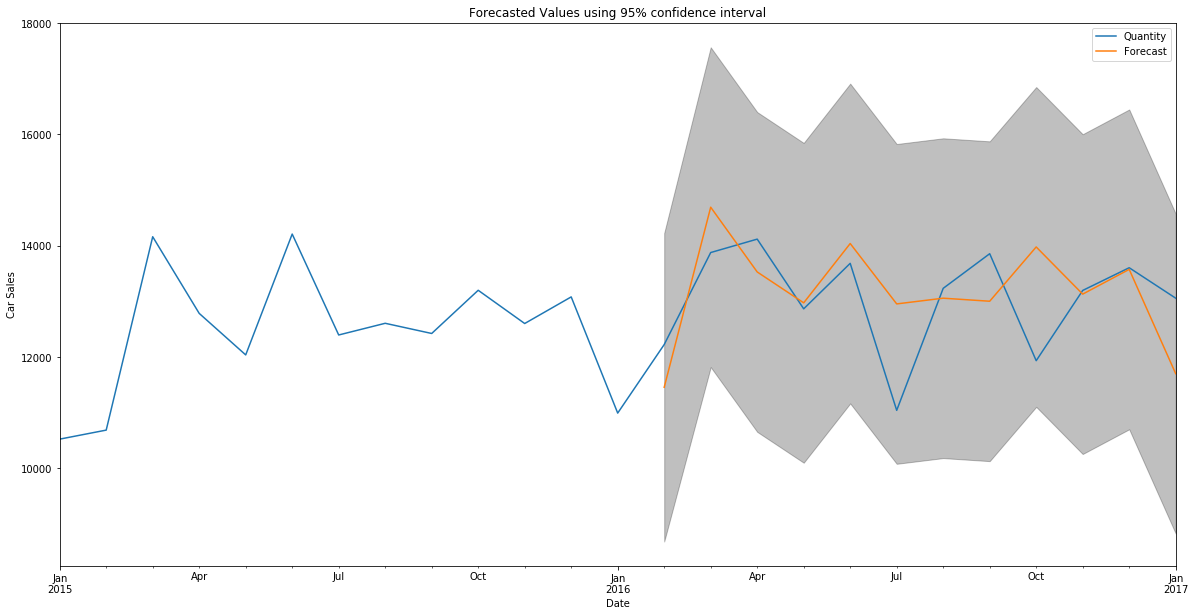

In [19]:
# Plots the forecasted observation values against the actual observation values, with a 95% confidence interval
forecast_res = tsf.plot_actuals_vs_forecast(df_sales, (0, 0, 1), (1, 0, 1, 12), 12, \
                        "Car Sales", '2016-02-01', '2015-01-01', "Year-Month", 0.05)

## Final Model Build

In [20]:
# Builds the final model once you found the optimal set of parameters
final_model_build = tsf.model_build(df_sales, (1, 1, 1), (1, 1, 0, 12))

In [21]:
# Prints the summary table from the model
print("Summary Results Table.") 
print(final_model_build.summary().tables[1])

Summary Results Table.
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3616      0.130     -2.791      0.005      -0.616      -0.108
ma.L1         -0.4941      0.108     -4.590      0.000      -0.705      -0.283
ar.S.L12      -0.4332      0.092     -4.705      0.000      -0.614      -0.253
sigma2      1.233e+06   1.76e+05      7.009      0.000    8.88e+05    1.58e+06


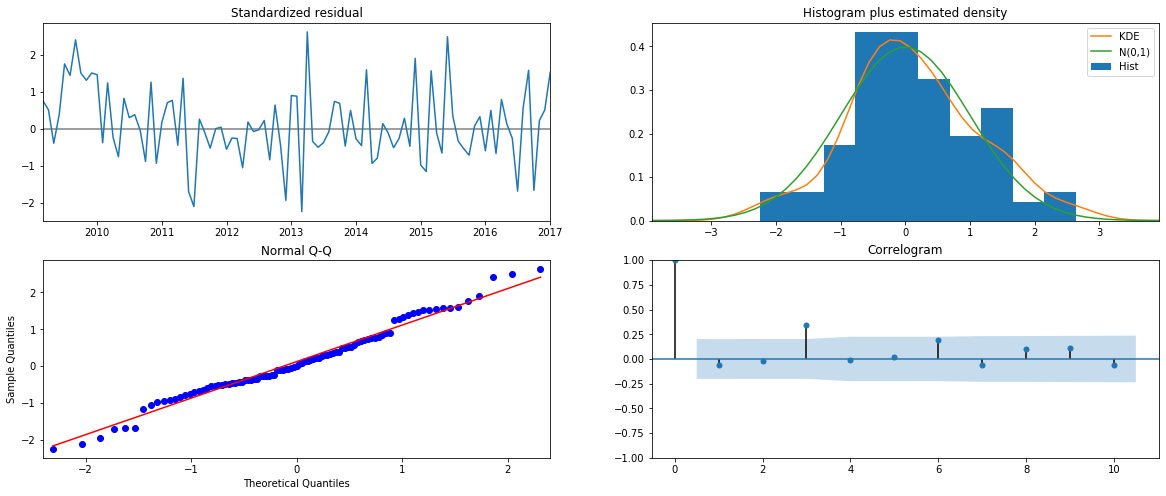

In [22]:
# Plots the model diagnostics
diag_fig = tsf.model_diagnostics(final_model_build)

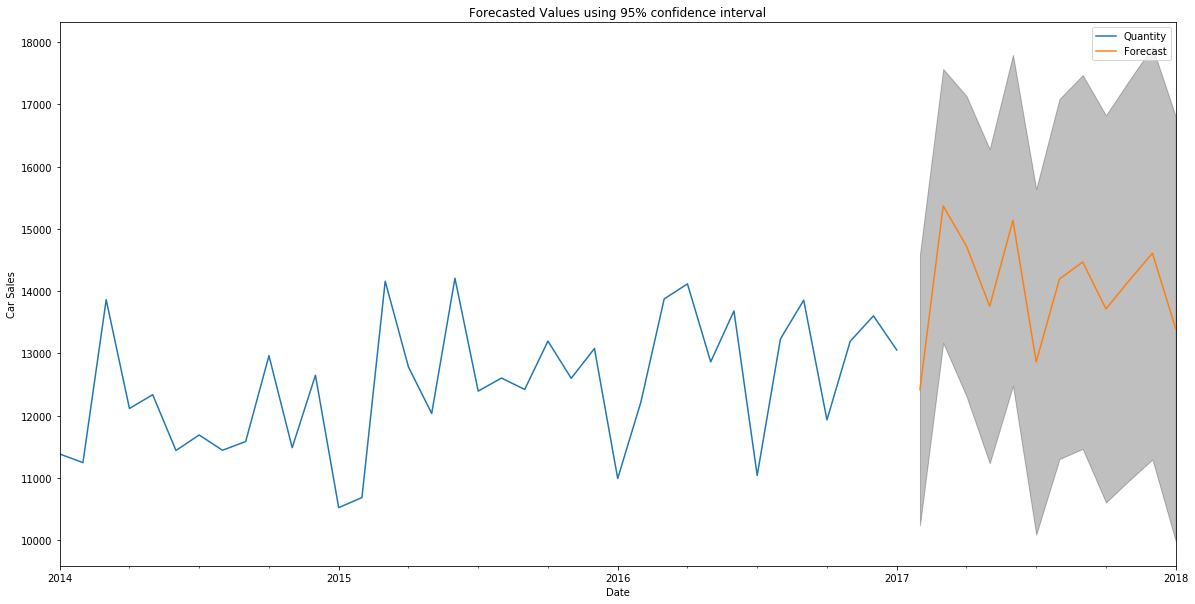

In [23]:
# Performs and plots the future forecasts
future_forecast_plot = tsf.plot_forecasts(final_model_build, 12, df_sales, "Car Sales", '2014-01-01')